In [99]:
#DrivenDampedElecOsc_HW12.py
#code to plot driven damped electric oscillator behavior
#imports:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
Question 1 g:
Under what condition does the total energy stored in the circuit depend highly on the resistance of the resistor?

When the resistance is significantly larger than the reactances of any capacitors or inductors present also when two 
resistors of equal size are placed in parallel of eachother in the circuit, is when the total energy stored in the 
circuit depends highly on the resistance of the resistor. 

Question 1 h:
For a given capacitor + inductor pair, should one choose a resistor with higher or lower resistance to maximize energy stored? Explain how
this is analogous to the mechanical driven and damped case?

Yes, one should choose a resistor with lower resistance to maximize the energy stored, because with Low resistance, it  
allows more oscillatory energy transfer between the inductor and capacitor, with less dependence on resistance for total stored energy. Choosing
a low resistance in an electrical RLC circuit is similar to choosing low damping in a mechanical oscillator. 
Both minimize energy dissipation and allow the system to maintain oscillations, maximizing stored energy.

'''

In [ ]:
'''
Question 2 f:
Explain why the circuit approaches steady state slower and has much larger charge amplitudes in the case when w_d=w_o compared with w_d=2w_0.

The circuit will approach steady state slower and has much larger amplitudes in the case when w_d=w_o because it takes more energy
to reach the amplitude and because the two angular frequencies are the same ratio creating more resistance and more energy to reach the
larger charge amplitudes.
'''


In [100]:
########## electrical constants ############
V_0 = 0.240 #V
L = 3.60 #H
C = 0.125 #uF
R1 = 3.00 #ohm
R2 = 0.75 #ohm

In [101]:
############ motion constants ##############
###natural restoring ###
w_0 = np.sqrt(1/(L*C))
### damping ###
gamma1 = R1/L
gamma2 = R2/L

In [102]:
### natural restoring + damping ###
Q1 = w_0/gamma1
Q2 = w_0/gamma2

In [103]:
### driving frequency ###
w_d = np.linspace(w_0 - 2, w_0 + 2, 1000)

In [104]:
##################################################
############## Steady-state solution ############
##################################################
#polar coordinate magnitudes
r1 = np.sqrt((w_0**2-w_d**2)**2+(gamma1**2)*(w_d**2))
r2 = np.sqrt((w_0**2-w_d**2)**2+(gamma2**2)*(w_d**2))
#polar coordinate phases
phi1 = np.arctan2((gamma1)*(w_d),((w_0**2-w_d**2)**2))
phi2 = np.arctan2((gamma2)*(w_d),((w_0**2-w_d**2)**2))
#steady state amplitudes
A_ss1 = (V_0/L)*(1/(np.sqrt((w_0**2-w_d**2)**2+(gamma1**2)*(w_d**2))))
A_ss2 = (V_0/L)*(1/(np.sqrt((w_0**2-w_d**2)**2+(gamma2**2)*(w_d**2))))
#steady state max current
Imax_ss1 = (A_ss1*w_d)
Imax_ss2 = (A_ss2*w_d)
#average power of drivers per oscillation in steady state
Pav_ss1 = (R1)*(w_d**2)*(A_ss1**2)*(0.5)
Pav_ss2 = (R2)*(w_d**2)*(A_ss2**2)*(0.5)

In [105]:
##################################################
############ Transient-state solution ##########
##################################################
#remove this and one at end of section to turn code on
#time array
t_final = (-2/gamma1)*np.log(0.99)
t = np.linspace(0,t_final, 1000)
#modified angular frequency
w1 = (w_0)*(np.sqrt(1-(1/(2*Q1))**2))
#phases of modified angular frequency
theta1 = np.arctan2(-gamma1, (2*w1))
#initial amplitude
A0 = (10)*(A_ss1)
#Transient-state solution
q_p = (A_ss1)*np.cos((w_d*t)-phi1)
q_h = A0*np.exp((-gamma1*t)/2)*np.cos((w1*t)+theta1)
q = q_p + q_h

In [106]:
A_ss1.shape, w_d.shape, t.shape, phi1.shape

((1000,), (1000,), (1000,), (1000,))

In [107]:
###################################################
################## PLOTTING #######################
###################################################

Text(0, 0.5, '$A_{ss}$ (Coulombs)')

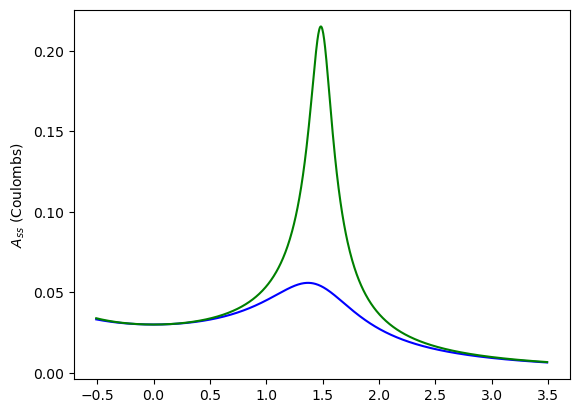

In [108]:
plt.clf()
######### Steady-state constants vs w_d ##########
#A_ss vs w_d
plt.plot(w_d, A_ss1, 'b-', label = 'Q1 = ' + str(np.round(Q1,2)))
plt.plot(w_d, A_ss2, 'g-', label = 'Q2 = ' + str(np.round(Q2,2)))
plt.ylabel(r'$A_{ss}$ (Coulombs)')

Text(0, 0.5, '$I_{max,ss}$ (Amperes)')

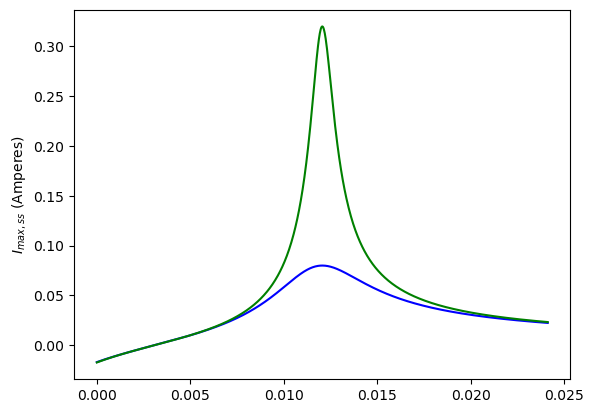

In [109]:
#vmax_ss vs w_d
plt.plot(t, Imax_ss1, 'b-', label = 'Q1 = ' + str(np.round(Q1,2)))
plt.plot(t, Imax_ss2, 'g-', label = 'Q2 = ' + str(np.round(Q2,2)))
plt.ylabel(r'$I_{max,ss}$ (Amperes)')

Text(0, 0.5, '$<P(t)>$ (Watts)')

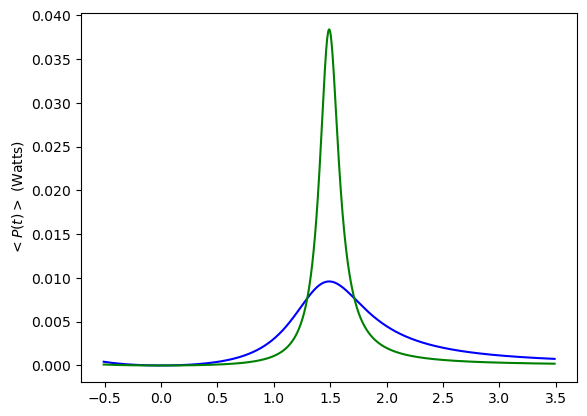

In [110]:
#Pav_ss vs w_d
plt.plot(w_d, Pav_ss1, 'b-', label = 'Q1 = ' + str(np.round(Q1,2)))
plt.plot(w_d, Pav_ss2, 'g-', label = 'Q2 = ' + str(np.round(Q1,2)))
plt.ylabel(r'$<P(t)>$ (Watts)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


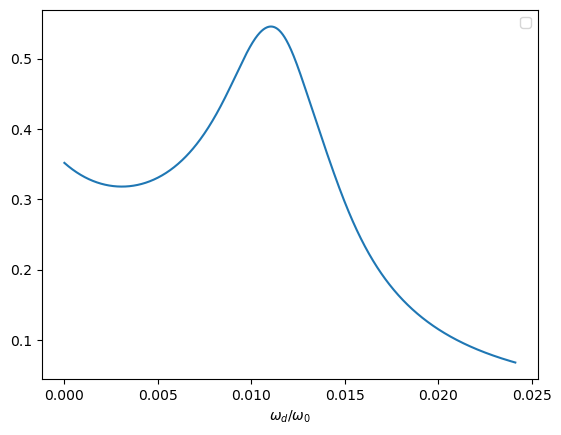

In [117]:
#SS plot labels
w_0 = np.sqrt(1/(L*C))
w_d = 2*w_0
plt.plot(t,q)
plt.xlabel(r'$\omega_{d}/\omega_{0} $')
plt.legend(loc=1)

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Morgan\AppData\Local\Temp\ipykernel_1252\2049766255.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.title(r'$\omega_{d}$ = ' + str(int(w_d/w_0)) + '$\omega_{0}$')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

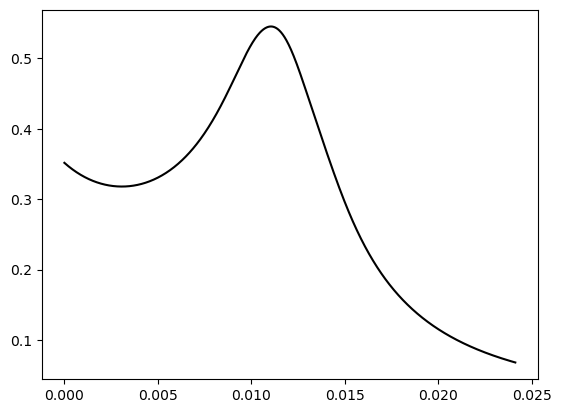

In [123]:
############## Transient-state q vs t ##############

#non-steady-state q
plt.plot(t, q, 'k-')
#horizontal line at A_ss
plt.axhline(y = A_ss1, label = r'$y=A_{ss}$')
#TS plot labels
plt.xlabel('Time (s)')
plt.ylabel('q (Units?)')
plt.title(r'$\omega_{d}$ = ' + str(int(w_d/w_0)) + '$\omega_{0}$')


plt.show()